This nb contains the steps to go from the raw data downloaded from Survey Monkey to the counts and graphs of the main three categories evaluators assigned segments: "Yes, there are terminological errors.", "Yes, there are errors, but not related to terminology.", and "No, there are no errors at all."

These counts are made per rater (both systems together), per system (all raters together) and per rater (system-specific).

In [7]:
import pandas as pd

file_path = 'rawhtqa.csv'
data = pd.read_csv(file_path)

selected_columns = data.iloc[:, 107:3507]
selected_columns.to_csv('bothsystems-data.csv', index=False)

print("Segments' data have been saved to 'bothsystems-data.csv'.")

Segments' data have been saved to 'bothsystems-data.csv'.


In [ ]:
import pandas as pd ### TO extract and transpose each system's ERROR CATEGORIES for analysis

file_path = 'rawhtqa.csv'
data = pd.read_csv(file_path)

# Select columns from index 0 to 108 (inclusive)
selected_columns = data.iloc[:, 107:3507]  #

# Save the selected columns (both systems' evaluations)
selected_columns.to_csv('bothsystems-data.csv', index=False)

print("Segments' data have been saved to 'bothsystems-data.csv'.")

import pandas as pd

# Load the CSV file bothsystems-data.csv, TO GET WEIGHTS DATA ONLY
file_path = 'bothsystems-data.csv'
data = pd.read_csv(file_path)

selected_columns = data.iloc[:, 0:1700]

# Save the selected columns
selected_columns.to_csv('Weights-data.csv', index=False)

print("Weights evaluation data have been saved to 'Weights-data.csv'.")

import pandas as pd


file_path = 'bothsystems-data.csv' # TO GET GOOGLE DATA ONLY
data = pd.read_csv(file_path)

selected_columns = data.iloc[:, 1700:3400]

# Save the selected columns
selected_columns.to_csv('Google-data.csv', index=False)

print("Google evaluation data have been saved to 'Google-data.csv'.")



file_path = 'Weights-data.csv'  # TO GET ERROR CATEGORIES, WEIGHTS
data = pd.read_csv(file_path)

# Define total columns and segment size
total_columns = data.shape[1]  # Total number of columns in your dataset
segment_size = 17

# Generate the list of starting indices (0, 17, 34, ..., etc.)
starting_indices = [i for i in range(0, total_columns, segment_size)]

# Extract the columns corresponding to the starting indices
starting_columns = data.iloc[:, starting_indices]

# Save the extracted
output_file = 'errors-Weights.csv'
starting_columns.to_csv(output_file, index=False)

print(f"Columns at indices {starting_indices} have been saved to '{output_file}'.")


file_path = 'Google-data.csv'  # TO GET ERROR CATEGORIES, GOOGLE
data = pd.read_csv(file_path)

total_columns = data.shape[1]
segment_size = 17

starting_indices = [i for i in range(0, total_columns, segment_size)]

starting_columns = data.iloc[:, starting_indices]

output_file = 'errors-Google.csv'
starting_columns.to_csv(output_file, index=False)

print(f"Columns at indices {starting_indices} have been saved to '{output_file}'.")

file_path = 'errors-Weights.csv'  # TO TRANSPOSE DATA ON WEIGHTS ERROR CATEGORIES FOR LATER CALCULATIONS
data = pd.read_csv(file_path)

# Transpose the data
transposed_data = data.T

# Remove the first column (if it contains "Response", which it does)
transposed_data = transposed_data.drop(transposed_data.columns[0], axis=1)

# Drop columns where all values are NaN
#transposed_data = transposed_data.drop(transposed_data.columns[2], axis=1)  # Column 3 has index 2

# Save the cleaned transposed data to a new CSV file
transposed_data.to_csv('transposed_errors-Weights.csv', index=False)

print(transposed_data.head())

file_path = 'errors-Google.csv'  # TO TRANSPOSE DATA ON WEIGHTS ERROR CATEGORIES FOR LATER CALCULATIONS
data = pd.read_csv(file_path)

transposed_data = data.T

transposed_data = transposed_data.drop(transposed_data.columns[0], axis=1)

#transposed_data = transposed_data.drop(transposed_data.columns[2], axis=1)

transposed_data.to_csv('transposed_errors-Google.csv', index=False)

print(transposed_data.head())

Segments' data have been saved to 'bothsystems-data.csv'.
Weights evaluation data have been saved to 'Weights-data.csv'.
Google evaluation data have been saved to 'Google-data.csv'.
Columns at indices [0, 17, 34, 51, 68, 85, 102, 119, 136, 153, 170, 187, 204, 221, 238, 255, 272, 289, 306, 323, 340, 357, 374, 391, 408, 425, 442, 459, 476, 493, 510, 527, 544, 561, 578, 595, 612, 629, 646, 663, 680, 697, 714, 731, 748, 765, 782, 799, 816, 833, 850, 867, 884, 901, 918, 935, 952, 969, 986, 1003, 1020, 1037, 1054, 1071, 1088, 1105, 1122, 1139, 1156, 1173, 1190, 1207, 1224, 1241, 1258, 1275, 1292, 1309, 1326, 1343, 1360, 1377, 1394, 1411, 1428, 1445, 1462, 1479, 1496, 1513, 1530, 1547, 1564, 1581, 1598, 1615, 1632, 1649, 1666, 1683] have been saved to 'errors-Weights.csv'.
Columns at indices [0, 17, 34, 51, 68, 85, 102, 119, 136, 153, 170, 187, 204, 221, 238, 255, 272, 289, 306, 323, 340, 357, 374, 391, 408, 425, 442, 459, 476, 493, 510, 527, 544, 561, 578, 595, 612, 629, 646, 663, 680, 697, 

In [26]:
# TO COUNT ERROR CATEGORIES PER ANNOTATOR, PER SYSTEM

file_path = 'transposed_errors-Weights.csv'
data = pd.read_csv(file_path)

# Define the categories
categories = [
    "Yes, there are terminological errors.",
    "Yes, there are errors, but not related to terminology.",
    "No, there are no errors at all."
]

# Initialize a dictionary to store counts for calculating means
category_totals = {category: 0 for category in categories}
category_counts = {category: 0 for category in categories}  # Tracks how many columns contributed to each category

# Save each column to a separate file and count occurrences
for i, column in enumerate(data.columns):
    # Save the column to a file
    output_file = f'output-rater{i}-Weights.csv'
    data[[column]].to_csv(output_file, index=False, header=False)

    # Read the saved file to ensure consistency with Ubuntu behavior
    with open(output_file, 'r') as f:
        content = f.readlines()

    # Count occurrences of each category using a flexible match
    print(f"Counts for {output_file}:")
    for category in categories:
        count = sum(1 for line in content if category in line)
        print(f"  {category}: {count}")
        category_totals[category] += count
        if count > 0:  # Increment count for non-zero contributions
            category_counts[category] += 1

# Calculate and display mean counts
print("\nMean count of each category across all columns Weights:")
for category in categories:
    mean_count = category_totals[category] / category_counts[category] if category_counts[category] > 0 else 0
    print(f"{category}: {mean_count:.2f}")


    file_path = 'transposed_errors-Google.csv'  ### SAME WITH GOOGLE
data = pd.read_csv(file_path)

# Define the categories
categories = [
    "Yes, there are terminological errors.",
    "Yes, there are errors, but not related to terminology.",
    "No, there are no errors at all."
]

# Initialize a dictionary to store counts for calculating means
category_totals = {category: 0 for category in categories}
category_counts = {category: 0 for category in categories}  # Tracks how many columns contributed to each category

# Save each column to a separate file and count occurrences
for i, column in enumerate(data.columns):
    # Save the column to a file
    output_file = f'output-rater{i}-Google.csv'
    data[[column]].to_csv(output_file, index=False, header=False)

    # Read the saved file to ensure consistency with Ubuntu behavior
    with open(output_file, 'r') as f:
        content = f.readlines()

    # Count occurrences of each category using a flexible match
    print(f"Counts for {output_file}:")
    for category in categories:
        count = sum(1 for line in content if category in line)
        print(f"  {category}: {count}")
        category_totals[category] += count
        if count > 0:  # Increment count for non-zero contributions
            category_counts[category] += 1

# Calculate and display mean counts
print("\nMean count of each category across all columns Google:")
for category in categories:
    mean_count = category_totals[category] / category_counts[category] if category_counts[category] > 0 else 0
    print(f"{category}: {mean_count:.2f}")

Counts for output-rater0-Weights.csv:
  Yes, there are terminological errors.: 29
  Yes, there are errors, but not related to terminology.: 18
  No, there are no errors at all.: 53
Counts for output-rater1-Weights.csv:
  Yes, there are terminological errors.: 60
  Yes, there are errors, but not related to terminology.: 22
  No, there are no errors at all.: 18
Counts for output-rater2-Weights.csv:
  Yes, there are terminological errors.: 45
  Yes, there are errors, but not related to terminology.: 8
  No, there are no errors at all.: 47

Mean count of each category across all columns Weights:
Yes, there are terminological errors.: 44.67
Yes, there are errors, but not related to terminology.: 16.00
No, there are no errors at all.: 39.33
Counts for output-rater0-Google.csv:
  Yes, there are terminological errors.: 14
  Yes, there are errors, but not related to terminology.: 10
  No, there are no errors at all.: 76
Counts for output-rater1-Google.csv:
  Yes, there are terminological errors

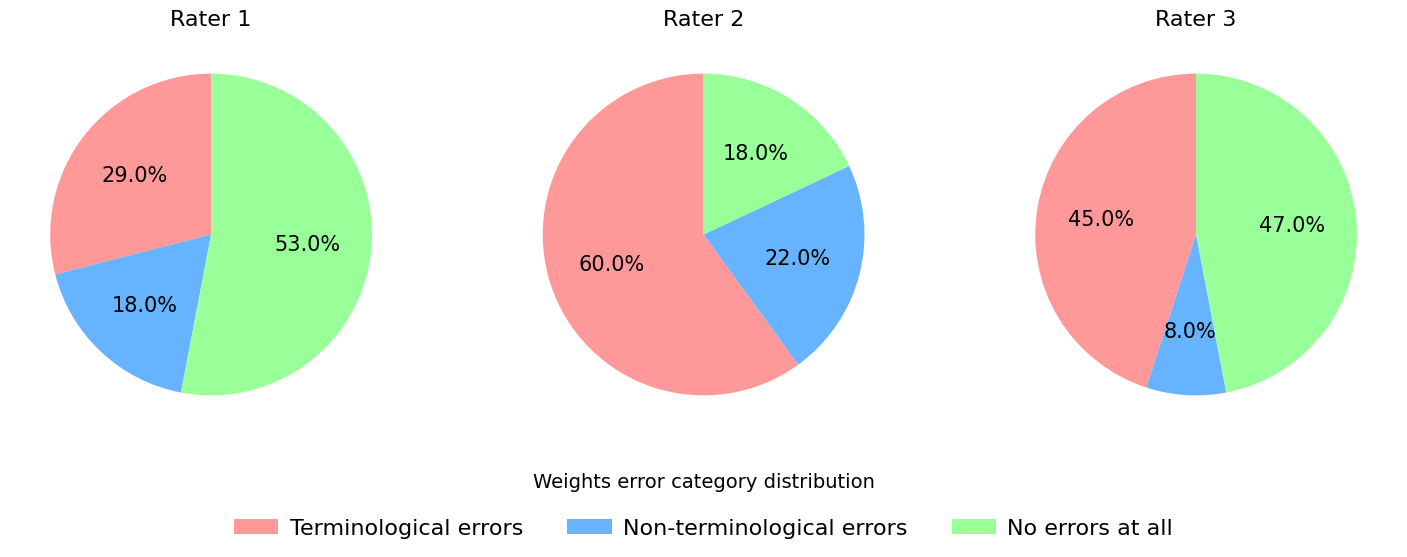

In [ ]:
    #### TO GET PIE CHARTS Weights PER RATER
import matplotlib.pyplot as plt

mean_counts = {
    "Terminological errors": 44.67, ### INTRODUCE PREVIOUS RESULTS
    "Non-terminological errors": 16.00,
    "No errors at all": 39.33,
}
colors = ['#ff9999', '#66b3ff', '#99ff99']
# Prepare data for the pie chart
labels = list(mean_counts.keys())  # Category labels
sizes = list(mean_counts.values())  # Mean values
plt.rcParams.update({'font.size': 15})

data = {
    "output-rater0-Weights.csv": {
        "Yes, there are terminological errors.": 29,
        "Yes, there are errors, but not related to terminology.": 18,
        "No, there are no errors at all.": 53,
    },
    "output-rater1-Weights.csv": {
        "Yes, there are terminological errors.": 60,
        "Yes, there are errors, but not related to terminology.": 22,
        "No, there are no errors at all.": 18,
    },
    "output-rater2-Weights.csv": {
        "Yes, there are terminological errors.": 45,
        "Yes, there are errors, but not related to terminology.": 8,
        "No, there are no errors at all.": 47,
    },
}

# Convert data to sizes for pie charts
sizes1 = [
    data["output-rater0-Weights.csv"]["Yes, there are terminological errors."],
    data["output-rater0-Weights.csv"]["Yes, there are errors, but not related to terminology."],
    data["output-rater0-Weights.csv"]["No, there are no errors at all."],
]
sizes2 = [
    data["output-rater1-Weights.csv"]["Yes, there are terminological errors."],
    data["output-rater1-Weights.csv"]["Yes, there are errors, but not related to terminology."],
    data["output-rater1-Weights.csv"]["No, there are no errors at all."],
]
sizes3 = [
    data["output-rater2-Weights.csv"]["Yes, there are terminological errors."],
    data["output-rater2-Weights.csv"]["Yes, there are errors, but not related to terminology."],
    data["output-rater2-Weights.csv"]["No, there are no errors at all."],
]

# Pie chart colors and labels
labels = ['Terminological errors', 'Non-terminological errors', 'No errors at all']
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Font sizes
title_fontsize = 16
autopct_fontsize = 15

# First pie chart
axes[0].pie(
    sizes1,
    autopct=lambda p: f'{p:.1f}%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': autopct_fontsize},
)
axes[0].set_title('Rater 1', fontsize=title_fontsize)

# Second pie chart
axes[1].pie(
    sizes2,
    autopct=lambda p: f'{p:.1f}%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': autopct_fontsize},
)
axes[1].set_title('Rater 2', fontsize=title_fontsize)

# Third pie chart
axes[2].pie(
    sizes3,
    autopct=lambda p: f'{p:.1f}%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': autopct_fontsize},
)
axes[2].set_title('Rater 3', fontsize=title_fontsize)

# Shared legend
fig.legend(
    labels,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    fontsize=16,
    frameon=False,
    markerscale=1.5,
    handletextpad=0.5,
    labelspacing=1.2,
    title="Weights error category distribution",
    title_fontsize=14,
    fancybox=True,
    shadow=False,
)

# Adjust layout for better spacing ofr legend
plt.tight_layout(rect=[0, 0.1, 1, 1]) 

# Save PNG
fig.savefig("error-category-rater-comparison-Weights.png", dpi=300, bbox_inches="tight")

plt.show()

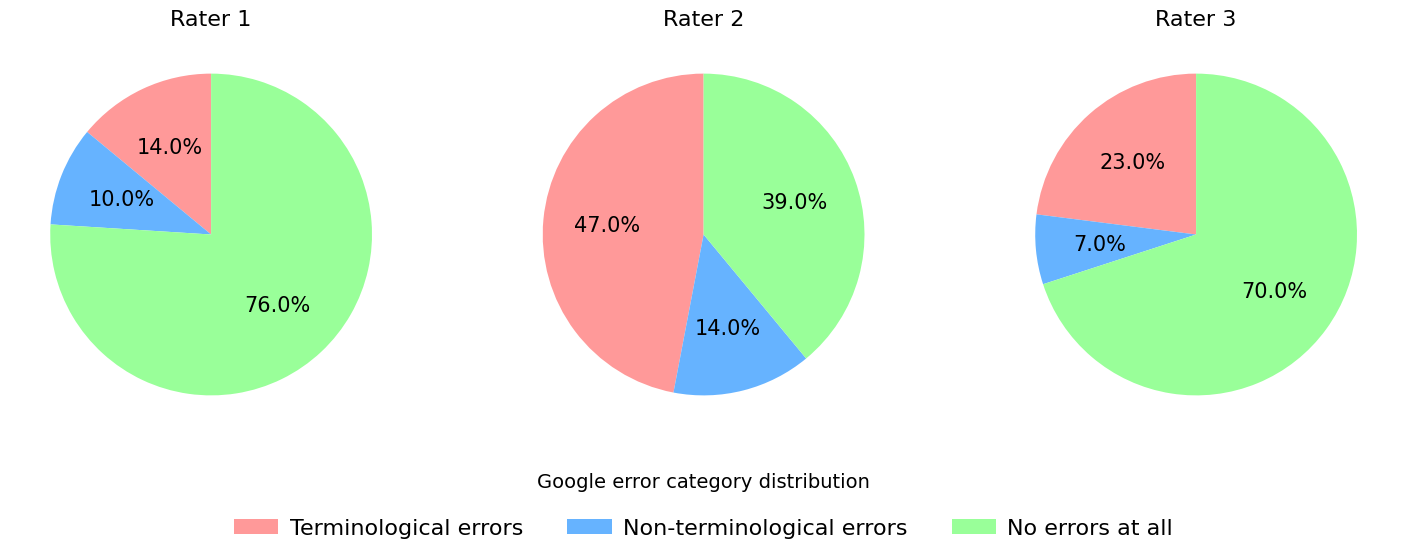

In [ ]:
#### TO GET PIE CHARTS, Google, PER RATER
import matplotlib.pyplot as plt

# Pre-calculated mean counts
mean_counts = {
    "Terminological errors": 28.00, # INTRODUCE PREVIOUS DATA RESULTS
    "Non-terminological errors": 10.33,
    "No errors at all.": 61.67,
}
colors = ['#ff9999', '#66b3ff', '#99ff99']
# Prepare data for the pie chart
labels = list(mean_counts.keys())  # Category labels
sizes = list(mean_counts.values())  # Mean values
plt.rcParams.update({'font.size': 15})


data = {
    "output-rater0-Google.csv": {
        "Yes, there are terminological errors.": 14,
        "Yes, there are errors, but not related to terminology.": 10,
        "No, there are no errors at all.": 76,
    },
    "output-rater1-Google.csv": {
        "Yes, there are terminological errors.": 47,
        "Yes, there are errors, but not related to terminology.": 14,
        "No, there are no errors at all.": 39,
    },
    "output-rater2-Google.csv": {
        "Yes, there are terminological errors.": 23,
        "Yes, there are errors, but not related to terminology.": 7,
        "No, there are no errors at all.": 70,
    },
}

# Convert data to sizes for pie charts
sizes1 = [
    data["output-rater0-Google.csv"]["Yes, there are terminological errors."],
    data["output-rater0-Google.csv"]["Yes, there are errors, but not related to terminology."],
    data["output-rater0-Google.csv"]["No, there are no errors at all."],
]
sizes2 = [
    data["output-rater1-Google.csv"]["Yes, there are terminological errors."],
    data["output-rater1-Google.csv"]["Yes, there are errors, but not related to terminology."],
    data["output-rater1-Google.csv"]["No, there are no errors at all."],
]
sizes3 = [
    data["output-rater2-Google.csv"]["Yes, there are terminological errors."],
    data["output-rater2-Google.csv"]["Yes, there are errors, but not related to terminology."],
    data["output-rater2-Google.csv"]["No, there are no errors at all."],
]

# Pie chart colors and labels
labels = ['Terminological errors', 'Non-terminological errors', 'No errors at all']
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Font sizes
title_fontsize = 16
autopct_fontsize = 15

# First pie chart
axes[0].pie(
    sizes1,
    autopct=lambda p: f'{p:.1f}%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': autopct_fontsize},
)
axes[0].set_title('Rater 1', fontsize=title_fontsize)

# Second pie chart
axes[1].pie(
    sizes2,
    autopct=lambda p: f'{p:.1f}%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': autopct_fontsize},
)
axes[1].set_title('Rater 2', fontsize=title_fontsize)

# Third pie chart
axes[2].pie(
    sizes3,
    autopct=lambda p: f'{p:.1f}%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': autopct_fontsize},
)
axes[2].set_title('Rater 3', fontsize=title_fontsize)

# Shared legend
fig.legend(
    labels,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    fontsize=16,
    frameon=False,
    markerscale=1.5,
    handletextpad=0.5,
    labelspacing=1.2,
    title="Google error category distribution",
    title_fontsize=14,
    fancybox=True,
    shadow=False,
)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.1, 1, 1])  

# Save the figure as a PNG
fig.savefig("error-category-rater-comparison-Google.png", dpi=300, bbox_inches="tight")

plt.show()

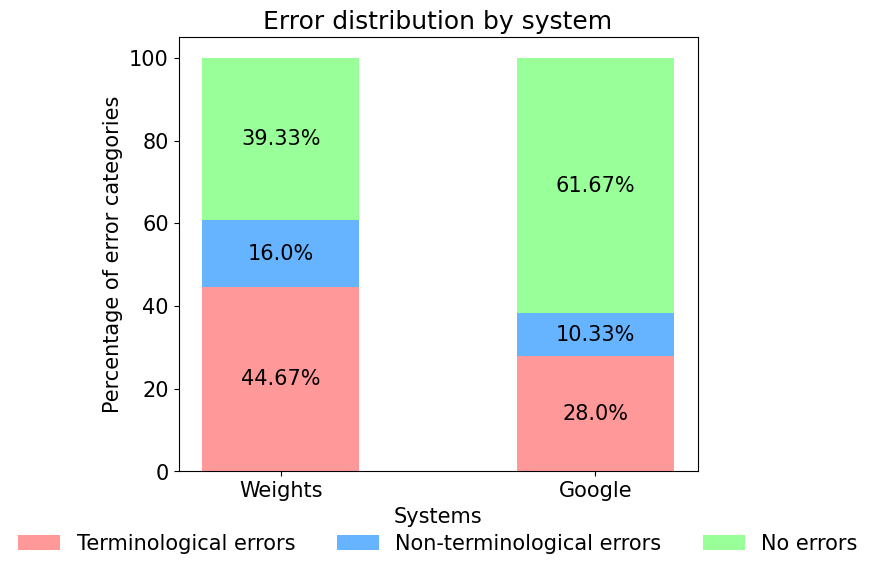

In [16]:
import matplotlib.pyplot as plt # TO GET AGGREGATED ERROR CATEGORY DATA PER SYSTEM

# Data format: {"System": [Terminological Errors, Non-terminological Errors, No Errors]}
data = {
    "Weights": [44.67, 16.00, 39.33],  # From PREVIOUS RESULTS (average in the last calculations)
    "Google": [28.00, 10.33, 61.67]   # From PREVIOUS RESULTS
}
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Ensure the percentages add up to 100 for each system
for system, percentages in data.items():
    if sum(percentages) != 100:
        raise ValueError(f"Percentages for {system} do not sum to 100: {percentages}")

# Step 2: Prepare data for plotting
systems = list(data.keys())
categories = ["Terminological errors", "Non-terminological errors", "No errors"]

# Step 3: Plot the data
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.5
x_positions = range(len(systems))

# Bottom tracker for stacking
bottoms = [0] * len(systems)

# Plot each category
for idx, category in enumerate(categories):
    values = [data[system][idx] for system in systems]
    bars = ax.bar(
        x_positions,
        values,
        width=bar_width,
        label=category,
        color=colors[idx],
        bottom=bottoms
    )
    bottoms = [bottom + value for bottom, value in zip(bottoms, values)]

    # Add percentage labels on each section
    for bar, value in zip(bars, values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Centered on the bar
            bar.get_y() + bar.get_height() / 2,  # Centered in the section
            f"{value}%",
            ha='center', va='center', fontsize=15, color='black'
        )

# Step 4: Customize the plot
ax.set_xticks(x_positions)
ax.set_xticklabels(systems)
ax.set_xlabel("Systems")
ax.set_ylabel("Percentage of error categories")
ax.set_title("Error distribution by system")

# Move the legend below the plot
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.1),  # Center the legend below the plot
    ncol=len(categories),  # Place all categories in a single horizontal row
    frameon=False  # Optional: remove the box around the legend
)

# Save the figure as a PNG file
fig.savefig("error-category-systems-comparison.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

In [ ]:
# JUST TO CHECK
import pandas as pd
file_path = 'errors-Google.csv'
data = pd.read_csv(file_path)
print(data.head())
print(data.tail())
print(data.columns)
print(data.shape)
print(data.dtypes)
print(data.isnull().sum())
print(data.info())
print(data.describe())

       Are there errors in this segment?  \
0                               Response   
1        No, there are no errors at all.   
2  Yes, there are terminological errors.   
3        No, there are no errors at all.   

                 Are there errors in this segment?.1  \
0                                           Response   
1                    No, there are no errors at all.   
2  Yes, there are errors, but not related to term...   
3                    No, there are no errors at all.   

                 Are there errors in this segment?.2  \
0                                           Response   
1  Yes, there are errors, but not related to term...   
2              Yes, there are terminological errors.   
3              Yes, there are terminological errors.   

     Are there errors in this segment?.3  \
0                               Response   
1  Yes, there are terminological errors.   
2  Yes, there are terminological errors.   
3  Yes, there are terminological errors. 